<a href="https://colab.research.google.com/github/ubudab109/object-detection-yolo-opencv/blob/master/skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Unzip data
!unzip /content/drive/MyDrive/yolo_skripsi/darknet/lele.zip -d /content/data

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15097, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 15097 (delta 8), reused 9 (delta 2), pack-reused 15072
Receiving objects: 100% (15097/15097), 13.45 MiB | 23.83 MiB/s, done.
Resolving deltas: 100% (10252/10252), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# make darknet (build)
!make

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# download cfg to google drive and change its name
!cp /content/darknet/cfg/yolov3.cfg /content/drive/MyDrive/yolo_skripsi/darknet/yolov3_custom.cfg

In [ ]:
!cp /content/drive/MyDrive/yolo_skripsi/darknet/yolov3_custom.cfg /content/darknet/cfg/

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/drive/MyDrive/yolo_skripsi/darknet/obj.names /content/data
!cp /content/drive/MyDrive/yolo_skripsi/darknet/obj.data  /content/data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /content/drive/MyDrive/yolo_skripsi/darknet/generate_train.py /content
!cp /content/drive/MyDrive/yolo_skripsi/darknet/generate_valid.py /content

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()

In [ ]:
!python /content/generate_train.py

In [ ]:
!python /content/generate_valid.py

In [ ]:
# verify train.txt can be seen in our /data folder
!ls /content/data/

obj.data   README.roboflow.txt	test.txt  train.txt
obj.names  test			train	  valid


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-06-06 01:59:25--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-06-06 01:59:25--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  19.9MB/s    in 8.5s    

2021-06-06 01:59:34 (18.2 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train /content/data/obj.data /content/darknet/cfg/yolov3_custom.cfg /content/darknet/darknet53.conv.74 -map -dont_show 2>&1 | tee /content/drive/MyDrive/yolo_skripsi/darknet/train.log 

In [ ]:
!./darknet detector train /content/data/obj.data /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolo_skripsi/darknet/yolov3_custom_last.weights -map -dont_show

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

imShow('chart.png')

In [ ]:
imShow('chart.png')

AttributeError: ignored

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' /content/darknet/cfg/yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' /content/darknet/cfg/yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 con

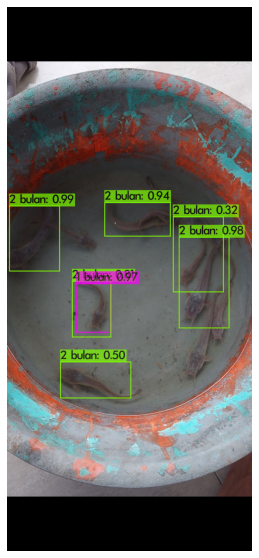

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test /content/data/obj.data /content/darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/yolo_skripsi/darknet/yolov3_custom_last.weights /content/drive/MyDrive/yolo_skripsi/darknet/all.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
60
64
68
72
76
80
84
88
92
96
100
104
108
112
116
120
124
Total Detection Time: 1 Seconds
Saving weights to /content/drive/MyDrive/yolo_skripsi/darknet//yolov3_custom_30000.weights
Saving weights to /content/drive/MyDrive/yolo_skripsi/darknet//yolov3_custom_last.weights
Saving weights to /content/drive/MyDrive/yolo_skripsi/darknet//yolov3_custom_final.weights
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...
 Detection layer: 16 - type = 28 
 Detection layer: 23 - type = 28 

 detections_count = 750, unique_truth_count = 722  
 rank = 0 of ranks = 750 
 rank = 100 of ranks = 750 
 rank = 200 of ranks = 750 
 rank = 300 of ranks = 750 
 rank = 400 of ranks = 750 
 rank = 500 of ranks = 750 
 rank = 600 of ranks = 750 
 rank = 700 of ranks = 750 
class_id = 0, name = 1 bulan, ap = 94.34%   	 (TP = 400, FP = 9) 
class_id = 1, name = 2 bulan, ap = 88.93%   	 (TP = 248, FP = 18) 

 for conf_thresh = 0.25, precision = 0.96, recall = 0.90, F1-score = 0.93 
 for conf_thresh = 0.25, TP = 648, FP = 27, FN = 74, average IoU = 76.86 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.916332, or 91.63 % 

Set -points flag:
 `-points 101` for MS COCO 
 `-points 11` for PascalVOC 2007 (uncomment `difficult` in voc.data) 
 `-points 0` (AUC) for ImageNet, PascalVOC 2010-2012, your custom dataset

 mean_average_precision (mAP@0.5) = 0.916332 
If you want to train from the beginning, then use flag in the end of training command: -clear 